In [1]:
import pandas as pd
import numpy as np
from pandas_datareader import data as pdr
from datetime import date, timedelta
import yfinance as yf
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

/var/folders/hs/191474ks0753rx0yhjd1cy_w0000gn/T/ipykernel_6755/2605376499.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
from stock_history import calc_dates
from stock_history import price_history
from stock_history import plot_stocks 

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


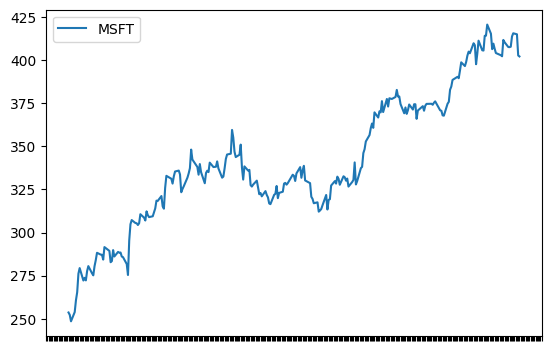

In [36]:
plot_stocks(["MSFT"], 365)

In [37]:
stock_prices = price_history(["MSFT"], 365)[0]

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/yfinance/utils.py:775: FutureWarning: The 'unit' keyword in TimedeltaIndex construction is deprecated and will be removed in a future version. Use pd.to_timedelta instead.
  df.index += _pd.TimedeltaIndex(dst_error_hours, 'h')
[*********************100%%**********************]  1 of 1 completed


In [38]:
from statsmodels.tsa.stattools import adfuller

def adf_test(dataset):
  dftest = adfuller(dataset, autolag = 'AIC')
  print("1. ADF : ",dftest[0])
  print("2. P-Value : ", dftest[1])
  print("3. Num Of Lags : ", dftest[2])
  print("4. Num Of Observations Used For ADF Regression and Critical Values Calculation :", dftest[3])
  print("5. Critical Values :")
  for key, val in dftest[4].items():
      print("\t",key, ": ", val)

In [39]:
adf_test(stock_prices["Close"])

1. ADF :  -1.7755175635911955
2. P-Value :  0.3926824845128857
3. Num Of Lags :  2
4. Num Of Observations Used For ADF Regression and Critical Values Calculation : 248
5. Critical Values :
	 1% :  -3.4569962781990573
	 5% :  -2.8732659015936024
	 10% :  -2.573018897632674


In [43]:
from pmdarima import auto_arima

import warnings
warnings.filterwarnings("ignore")
stepwise_fit = auto_arima(stock_prices["Close"], suppress_warnings=True)           

stepwise_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                  251
Model:               SARIMAX(2, 1, 2)   Log Likelihood                -739.125
Date:                Thu, 07 Mar 2024   AIC                           1490.250
Time:                        15:24:48   BIC                           1511.379
Sample:                             0   HQIC                          1498.754
                                - 251                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.7498      0.341      2.198      0.028       0.081       1.418
ar.L1          0.5340      0.175      3.053      0.002       0.191       0.877
ar.L2         -0.7894      0.142     -5.577      0.000      -1.067      -0.512
ma.L1         -0.6184      0.189     -3.272      0.001      -0.989      -0.248
ma.L2          0.7307      0.167      4.369      0.000       0.403       1.058
sigma2        21.6400      1.744     12.407      0.000      18.221      25.058
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                 6.91
Prob(Q):                              0.90   Prob(JB):                         0.03
Heteroskedasticity (H):               0.78   Skew:                             0.12
Prob(H) (two-sided):                  0.26   Kurtosis:                         3.78
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [64]:
from statsmodels.tsa.arima.model import ARIMA
model=ARIMA(stock_prices["Close"],order=(2,1,2))
stock_training=model.fit()
stock_training.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                  Close   No. Observations:                  251
Model:                 ARIMA(2, 1, 2)   Log Likelihood                -741.656
Date:                Thu, 07 Mar 2024   AIC                           1493.311
Time:                        16:58:00   BIC                           1510.919
Sample:                             0   HQIC                          1500.398
                                - 251                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5400      0.145      3.730      0.000       0.256       0.824
ar.L2         -0.8337      0.124     -6.721      0.000      -1.077      -0.591
ma.L1         -0.6105      0.159     -3.837      0.000      -0.922      -0.299
ma.L2          0.7837      0.145      5.409      0.000       0.500       1.068
sigma2        22.0814      1.774     12.444      0.000      18.604      25.559
===================================================================================
Ljung-Box (L1) (Q):                   0.11   Jarque-Bera (JB):                 7.06
Prob(Q):                              0.74   Prob(JB):                         0.03
Heteroskedasticity (H):               0.77   Skew:                             0.10
Prob(H) (two-sided):                  0.23   Kurtosis:                         3.80
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [66]:
import pickle
with open('trained_model.pkl', 'wb') as f:
    pickle.dump(stock_training, f)

In [ ]:
#enter the following code to load trained model:
#import pickle
#with open('trained_model.pkl', 'rb') as f:
   # stock_training = pickle.load(f)